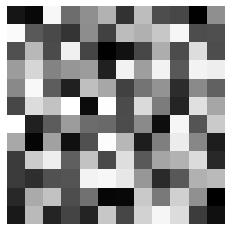

In [ ]:
import pylab as plt
import numpy as np
import cv2
#creating a random image of size 12*12
original_img = np.random.random((12,12))   # Test data
plt.figure()
plt.axis("off")
#showing the image
a = plt.imshow(original_img, cmap='gray', interpolation='nearest')
#saving the image
plt.savefig('original_img.png', dpi=300, bbox_inches='tight')

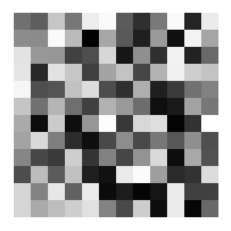

In [ ]:
#removing noise using kernel median filter
# Importing Image and ImageFilter module from PIL package  
from PIL import Image, ImageFilter 
import matplotlib.pyplot as plt   

# creating a image object 
im1 = Image.open(r"/content/original_img.png") 
     
# applying the median filter 
im2 = im1.filter(ImageFilter.MedianFilter(size = 3)) 

#showing the image
plt.figure();
plt.axis("off");
noise_img = plt.imshow(im2, cmap=plt.get_cmap('gray'))
plt.savefig('noise2_img.png', dpi=300, bbox_inches='tight')

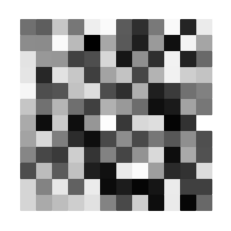

In [ ]:
#mode filter( here i have applied this filter 4 times to get more informative image )
# import the required PIL Modules

from PIL import Image
from PIL import ImageFilter

# Load an image
imageObject = Image.open("/content/noise2_img.png");

# Apply mode filter 4 times to get more clear image
modeFilterApplied = imageObject.filter(ImageFilter.ModeFilter);
for i in range (0, 3):
  modeFilterApplied = modeFilterApplied.filter(ImageFilter.ModeFilter);

# Show the image with mode filter applied
modeFilterApplied;
plt.figure();
plt.axis("off");
plt.imshow(modeFilterApplied, cmap=plt.get_cmap('gray'));

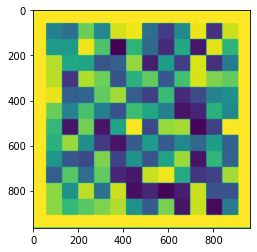

In [ ]:

# Low Pass SPatial Domain Filtering
# to observe the blurring effect


import cv2
import numpy as np

	
# Read the image
img = cv2.imread('/content/noise2_img.png', 0)

# Obtain number of rows and columns
# of the image
m, n = img.shape

# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
		
		img_new[i, j]= temp
		
img_new = img_new.astype(np.uint8)
cv2.imwrite('blurred.png', img_new)
plt.imshow(img_new)

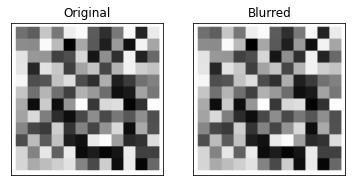

In [ ]:
#blurring
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/original_img.png')
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

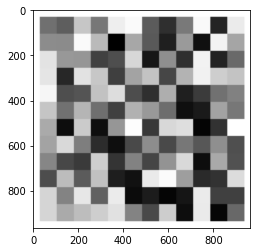

In [ ]:
#gaussian blurring
g_blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(g_blur)

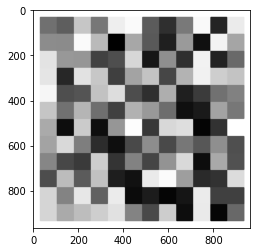

In [ ]:
#median blurring
median_blur = cv.medianBlur(img,5)
plt.imshow(median_blur)

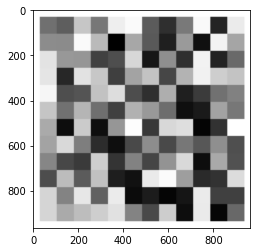

In [ ]:
#Gaussian filtering - removing noise
img = cv.imread('/content/original_img.png')
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur)

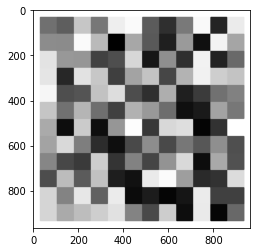

In [ ]:
#median filtering
median = cv2.medianBlur(img,5)
plt.imshow(median)

In [ ]:
pip install pillow

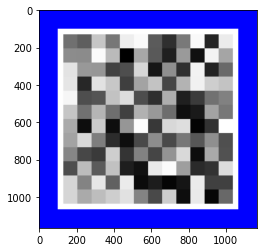

In [ ]:
# padding

from PIL import Image

image = Image.open("/content/original_img.png")

right = 100
left = 100
top = 100
bottom = 100

width, height = image.size

new_width = width + right + left
new_height = height + top + bottom

result = Image.new(image.mode, (new_width, new_height), (0, 0, 255))

result.paste(image, (left, top))

result.save('padded.png')
plt.imshow(result)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


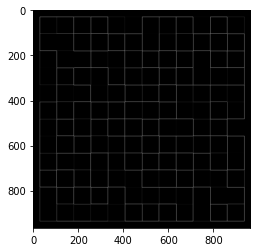

In [ ]:
#lAPLACE Filter
    # Declare the variables we are going to use
ddepth = cv.CV_16S
kernel_size = 3
window_name = "Laplace Demo"
    # [variables]
    # [load]

    #src = Image.open("/content/original_img.png")
src = cv.imread('/content/original_img.png')
dst = cv.Laplacian(src, ddepth, ksize=kernel_size)
plt.imshow(dst)

In [ ]:
#detecting edges
#sobel
#prewitt

In [ ]:
from google.colab.patches import cv2_imshow

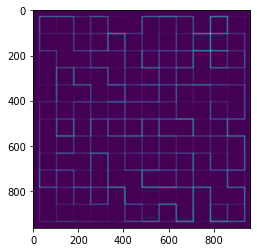

In [ ]:
#Laplacian of a Gaussian (LoG) detector

import numpy as np
import scipy.misc
import cv2  # using opencv as I am not too familiar w/ scipy yet, sorry 


def laplace_of_gaussian(gray_img, sigma=1., kappa=0.75, pad=False):
   
    assert len(gray_img.shape) == 2
    img = cv2.GaussianBlur(gray_img, (0, 0), sigma) if 0. < sigma else gray_img
    img = cv2.Laplacian(img, cv2.CV_64F)
    rows, cols = img.shape[:2]
    # min/max of 3x3-neighbourhoods
    min_map = np.minimum.reduce(list(img[r:rows-2+r, c:cols-2+c]
                                     for r in range(3) for c in range(3)))
    max_map = np.maximum.reduce(list(img[r:rows-2+r, c:cols-2+c]
                                     for r in range(3) for c in range(3)))
    # bool matrix for image value positiv (w/out border pixels)
    pos_img = 0 < img[1:rows-1, 1:cols-1]
    # bool matrix for min < 0 and 0 < image pixel
    neg_min = min_map < 0
    neg_min[1 - pos_img] = 0
    # bool matrix for 0 < max and image pixel < 0
    pos_max = 0 < max_map
    pos_max[pos_img] = 0
    # sign change at pixel?
    zero_cross = neg_min + pos_max
    # values: max - min, scaled to 0--255; set to 0 for no sign change
    value_scale = 255. / max(1., img.max() - img.min())
    values = value_scale * (max_map - min_map)
    values[1 - zero_cross] = 0.
    # optional thresholding
    if 0. <= kappa:
        thresh = float(np.absolute(img).mean()) * kappa
        values[values < thresh] = 0.
    log_img = values.astype(np.uint8)
    if pad:
        log_img = np.pad(log_img, pad_width=1, mode='constant', constant_values=0)
    return log_img


def _main():
    """Test routine"""
    # load grayscale image
    img = scipy.misc.face()  # lena removed from newer scipy versions
    img = cv.imread('/content/original_img.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # apply LoG
    log = laplace_of_gaussian(img)
    # display
    #cv2.imshow('LoG.png', log)
    plt.imshow(log)
    cv2.waitKey(0)


if __name__ == '__main__':
    _main()

In [ ]:

#image detection
import cv2
from matplotlib import pyplot as plt

# Opening image
img = cv2.imread("image.jpg")

# OpenCV opens images as BRG
# but we want it as RGB We'll
# also need a grayscale version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Use minSize because for not
# bothering with extra-small
# dots that would look like STOP signs
stop_data = cv2.CascadeClassifier('stop_data.xml')

found = stop_data.detectMultiScale(img_gray,
								minSize =(20, 20))

# Don't do anything if there's
# no sign
amount_found = len(found)

if amount_found != 0:
	
	# There may be more than one
	# sign in the image
	for (x, y, width, height) in found:
		
		# We draw a green rectangle around
		# every recognized sign
		cv2.rectangle(img_rgb, (x, y),
					(x + height, y + width),
					(0, 255, 0), 5)
		
# Creates the environment of
# the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

error: ignored

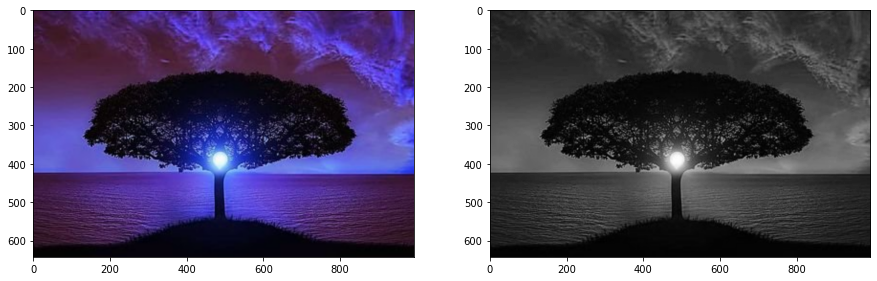

In [ ]:
#image segmentation
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = cv.imread('/content/bk.png')
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)

# Converting RGB image to Monochrome
gray_coffee = rgb2gray(coffee)
plt.subplot(1, 2, 2)

# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_coffee, cmap="gray")


Text(0.5, 1.0, 'Canny detector')

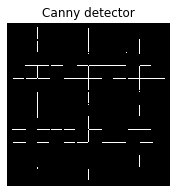

In [ ]:
#edge segmentation
from skimage.feature import canny

coins = cv.imread('/content/original_img.png')
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
edges = canny(coins/255.)
fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Canny detector')

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
#thresholding
# Python program to illustrate
# simple thresholding type on an image
	
# organizing imports
import cv2
import numpy as np

# path to input image is specified and
# image is loaded with imread command
image1 = cv2.imread('/content/original_img.png')

# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# applying different thresholding
# techniques on the input image
# all pixels value above 120 will
# be set to 255
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)

#thresholds as images

# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images
cv2.imshow('Binary Threshold', thresh1)
cv2.imshow('Binary Threshold Inverted', thresh2)
cv2.imshow('Truncated Threshold', thresh3)
cv2.imshow('Set to 0', thresh4)
cv2.imshow('Set to 0 Inverted', thresh5)

# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
	cv2.destroyAllWindows()


DisabledFunctionError: ignored

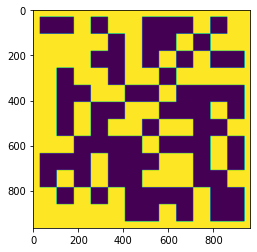

In [ ]:
from skimage.filters import threshold_otsu
image = cv2.imread('/content/original_img.png',0)
thresh = threshold_otsu(image)
binary_global = image > thresh
plt.imshow(binary_global)

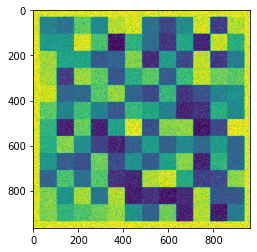

In [ ]:
#adding noise - Salt and pepper
import numpy as np
import random
import cv2

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('/content/original_img.png',0) # Only for grayscale image
noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.jpg', noise_img)
plt.imshow(noise_img)

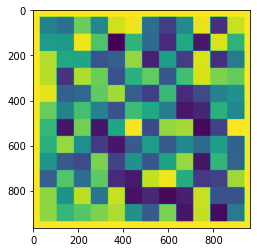

In [ ]:
#adding noise gaussian 
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy
image = cv2.imread('/content/original_img.png',0)
a = noisy("gauss", image)
plt.imshow(a)

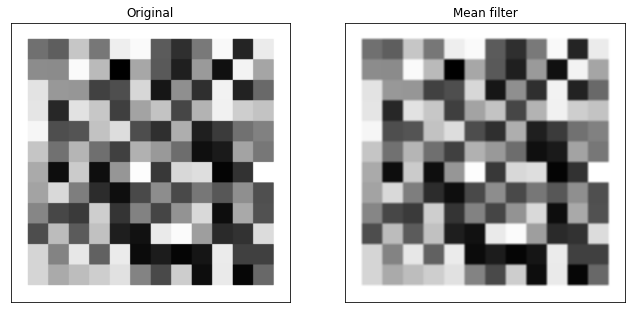

In [ ]:
#removing noises
#mean filter is use to remove the noise
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('/content/noise2_img.png') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

NameError: ignored

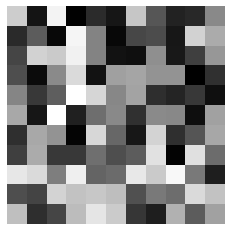

In [ ]:
#wiener process - noise removing


#creating random image
ori = np.random.random((11,11))   # Test data
plt.figure()
plt.axis("off")
#showing the image
a = plt.imshow(ori, cmap='gray', interpolation='nearest')
#saving the image
plt.savefig('ori.png', dpi=300, bbox_inches='tight')
img = cv2.imread('/content/ori.png')
#wiener filter
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

wiener_filter(img, 11, 11)

In [ ]:
#erosion and dilation
# Python program to demonstrate erosion and
# dilation of images.
import cv2
import numpy as np

# Reading the input image
img = cv2.imread('/content/original_img.png', 0)

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

cv2.imwrite('Input.png', img)
plt.imshow(img)
print('EROSION')
cv2.imwrite('Erosion.png', img_erosion)
plt.imshow(img_erosion)
print('DILATION')
cv2.imwrite('Dilation.png', img_dilation)
plt.imshow(img_dilation)


In [ ]:
#EROSION
import cv2
import numpy as np

img = cv2.imread('/content/original_img.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion)

In [ ]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation)

In [ ]:
#opening
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

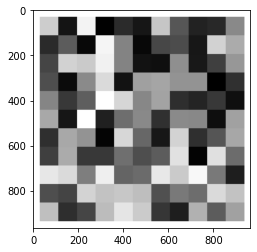

In [ ]:
#CLOSING
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

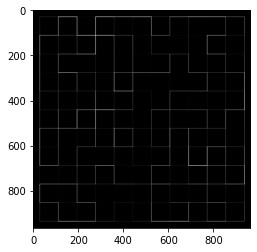

In [ ]:
#morphological gradient
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

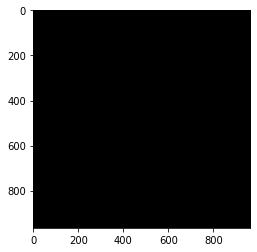

In [ ]:
#TOPHAT
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat)

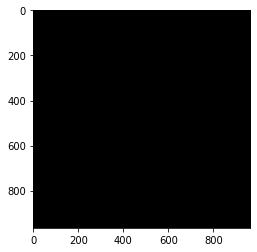

In [ ]:
#BLACKHAT
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat)

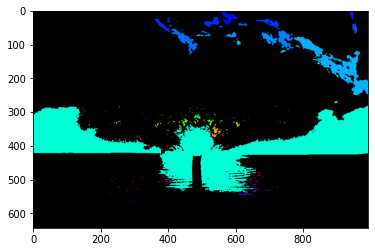

In [ ]:
#extraction of connected component
import cv2
import numpy as np

img = cv2.imread('bk.png', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
num_labels, labels_im = cv2.connectedComponents(img)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2.imwrite('labeled.png', labeled_img)
    plt.imshow(labeled_img)
    cv2.waitKey()

imshow_components(labels_im)

-1

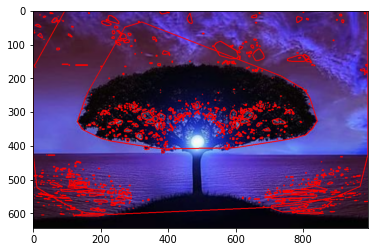

In [ ]:
#convex hull
import cv2
from matplotlib import pyplot as plt
# Load the image
img1 = cv2.imread('/content/bk.png')
# Convert it to greyscale
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# Threshold the image
ret, thresh = cv2.threshold(img,50,255,0)
# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# For each contour, find the convex hull and draw it
# on the original image.
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    cv2.drawContours(img1, [hull], -1, (255, 0, 0), 2)
# Display the final convex hull image
cv2.imwrite('ConvexHull.png', img1)
plt.imshow(img1)
cv2.waitKey(0)

-1

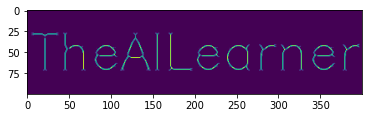

In [ ]:
#Thinning
    
import cv2
import numpy as np
 
# Create an image with text on it
img = np.zeros((100,400),dtype='uint8')
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'TheAILearner',(5,70), font, 2,(255),5,cv2.LINE_AA)
img1 = img.copy()
 
# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Create an empty output image to hold values
thin = np.zeros(img.shape,dtype='uint8')
 
# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
    # Erosion
    erode = cv2.erode(img1,kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Subtract these two
    subset = erode - opening
    # Union of all previous sets
    thin = cv2.bitwise_or(subset,thin)
    # Set the eroded image for next iteration
    img1 = erode.copy()
    
cv2.imwrite('original.png',img)
cv2.imwrite('thinned.png',thin)
plt.imshow(thin)
cv2.waitKey(0)

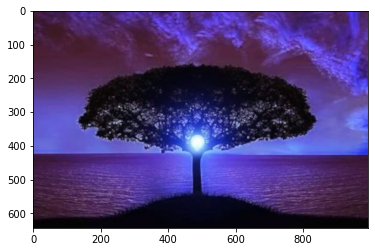

In [ ]:
#Thickeing
mask = cv2.imread('/content/bk.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dilate = cv2.dilate(mask, kernel, iterations=1)
plt.imshow(dilate)

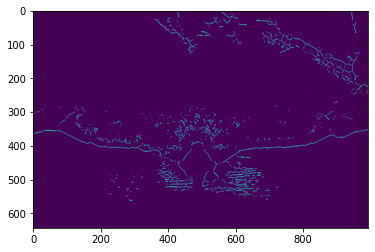

In [ ]:
#skeletons

# Import the necessary libraries
import cv2
import numpy as np

# Read the image as a grayscale image
img = cv2.imread('/content/bk.png', 0)

# Threshold the image
ret,img = cv2.threshold(img, 127, 255, 0)

# Step 1: Create an empty skeleton
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img)==0:
        break

# Displaying the final skeleton
cv2.imwrite("Skeleton.png",skel)
plt.imshow(skel)

In [ ]:
#pruning may be is same as skeleton


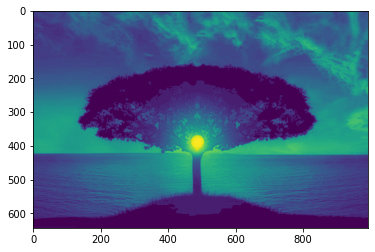

In [ ]:
#morphological reconstruction
#GEODESIC dilation and erosion
from skimage.morphology.greyreconstruct import reconstruction
import numpy as np   
import cv2
from skimage.morphology import disk,erosion
import matplotlib.pyplot as plt
gray  = cv2.imread('/content/bk.png', 0)
element = disk(3)
eroded = erosion(gray,element)
reconst= reconstruction(eroded,gray,'dilation')
cv2.imwrite("reconst.png",reconst)
plt.imshow(reconst)


In [ ]:
#opening and closing reconstruction
